<a href="https://colab.research.google.com/github/juniofarias/junio-portifolio/blob/main/gorjetarestaurante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#carregar o dataset de gorjetas do seaborn
tips = sns.load_dataset('tips')
#exibir as primeiras linhas do dataset para entender a estrutura
(tips.head())
#obtem informações sobre o dataset, como tipos de dados e valores não nulos
print(tips.info())
# obtém estatisticas descritivas das colunas numericas
print(tips.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


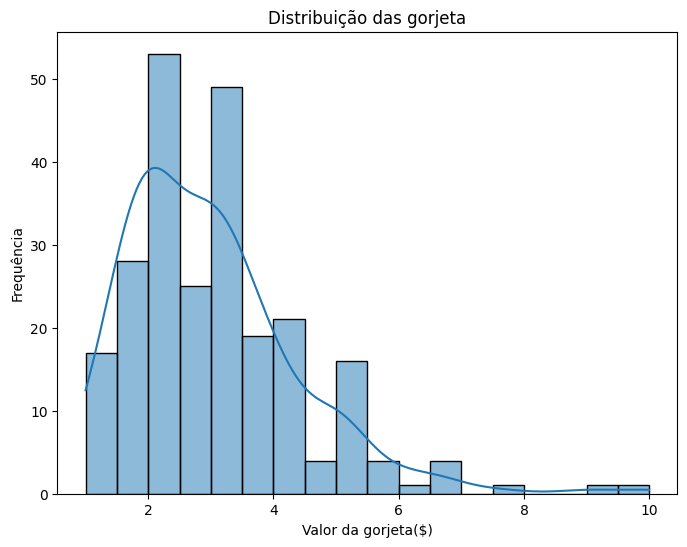

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(tips['tip'], kde=True)
plt.title('Distribuição das gorjeta')
plt.xlabel('Valor da gorjeta($)')
plt.ylabel('Frequência')
plt.show()




Dsitribuição das gorjetas

Célula 4: relação entre o valor total da conta e a gorjeta

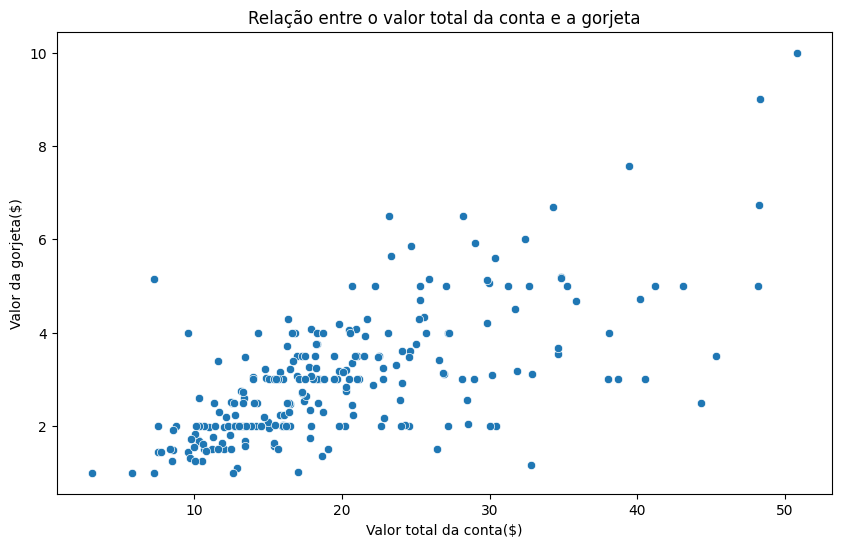

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title('Relação entre o valor total da conta e a gorjeta')
plt.xlabel('Valor total da conta($)')
plt.ylabel('Valor da gorjeta($)')
plt.show()

Célula 5: Gorjeta em relação ao dia de semana
  

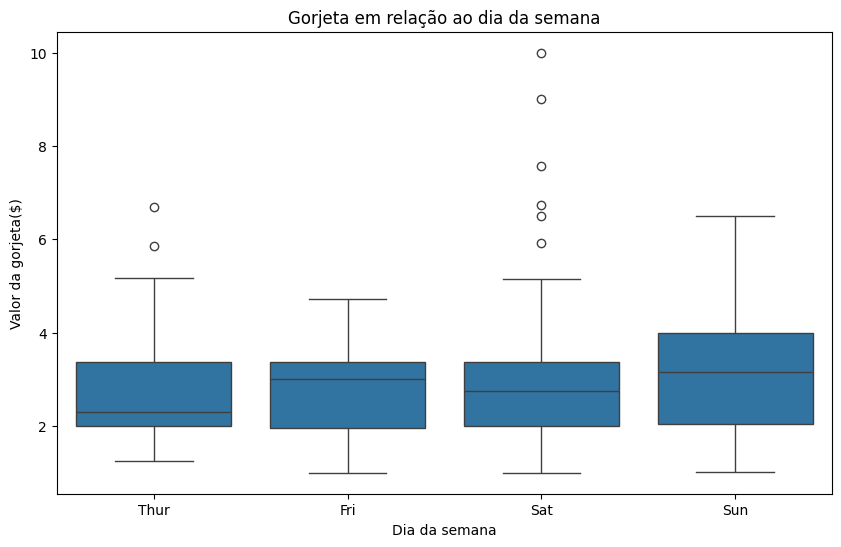

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='day', y='tip', data=tips)
plt.title('Gorjeta em relação ao dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Valor da gorjeta($)')
plt.show()

Célula 6: Gorjeta em relação ao horario da refeição

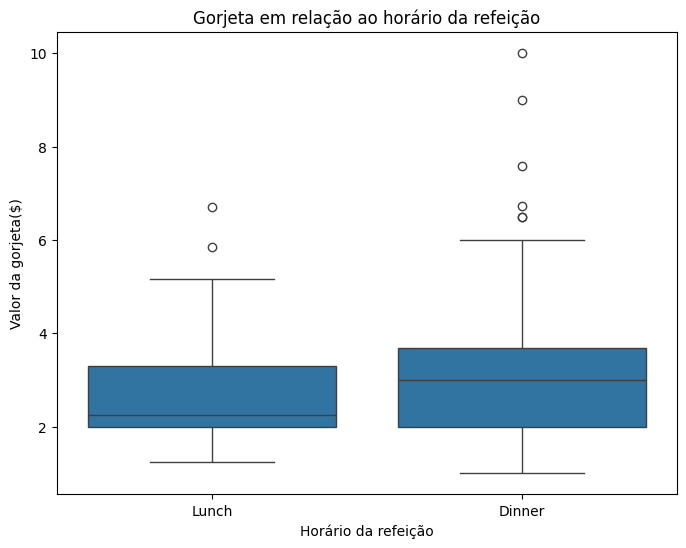

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='time', y='tip', data=tips)
plt.title('Gorjeta em relação ao horário da refeição')
plt.xlabel('Horário da refeição')
plt.ylabel('Valor da gorjeta($)')
plt.show()
#

Célula 7: Proporção da gorjeta em relação ao valor total da conta

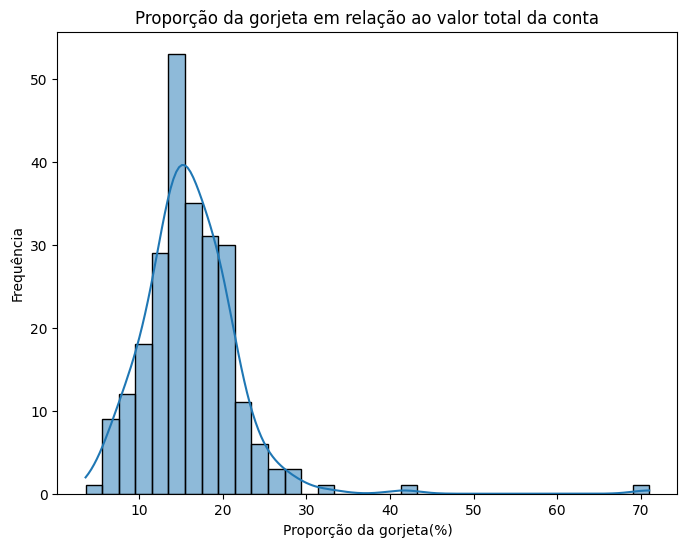

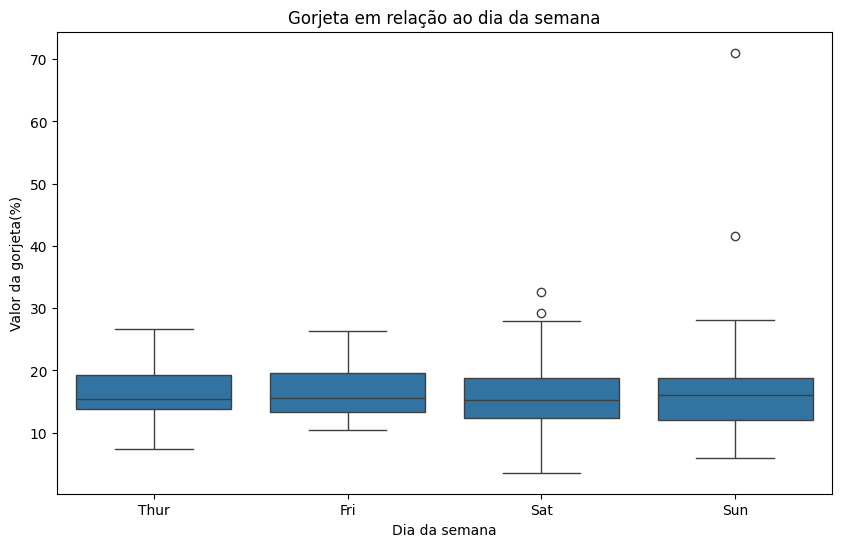

In [ ]:
tips['tip_percentage'] = tips['tip'] / tips['total_bill']*100

plt.figure(figsize=(8,6))
sns.histplot(tips['tip_percentage'], kde=True)
plt.title('Proporção da gorjeta em relação ao valor total da conta')
plt.xlabel('Proporção da gorjeta(%)')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='day', y='tip_percentage', data=tips)
plt.title('Gorjeta em relação ao dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Valor da gorjeta(%)')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter

#carrega o dataset de gorjetas
tips = sns.load_dataset('tips')

#1. calcular as medias historicas de gorjetas por dia da semana
media_gorjeta_por_dia = tips.groupby('day')['tip'].mean()
print("média de gorjeta por dia da semana:\n", media_gorjeta_por_dia)

#2. calcular a média historica de gorjeta por horario da refeição
media_gorjeta_por_horario = tips.groupby('time')['tip'].mean()
print("\nmédia de gorjeta por horário da refeição:\n", media_gorjeta_por_horario)

#3. supondo o mes de junho de 2025
#vamos contar quantos de cada dia da semana há em um junho de 2025
junho_2025 = pd.date_range(start='2025-06-01', end='2025-06-30', freq='D')
dias_da_semana_junho = [dia.strftime('%a')for dia in junho_2025]
contagem_dias = Counter(dias_da_semana_junho)
print("\ncontagem de dias da semana em junho de 2025:\n", contagem_dias)

#4. estimativa grosseira da gorjeta total para junho ( usando apenas a media por dia)
estimativa_total_junho = 0
for dia, media in media_gorjeta_por_dia.items():
  if dia in contagem_dias:
    estimativa_total_junho += media * contagem_dias[dia]

print(f"\nEstimativa grosseira da gorjeta total para junho de 2025: ${estimativa_total_junho: .2f}")

média de gorjeta por dia da semana:
 day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

média de gorjeta por horário da refeição:
 time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

contagem de dias da semana em junho de 2025:
 Counter({'Sun': 5, 'Mon': 5, 'Tue': 4, 'Wed': 4, 'Thu': 4, 'Fri': 4, 'Sat': 4})

Estimativa grosseira da gorjeta total para junho de 2025: $ 39.19


<ipython-input-27-0b4182f0d29f>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_gorjeta_por_dia = tips.groupby('day')['tip'].mean()
<ipython-input-27-0b4182f0d29f>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_gorjeta_por_horario = tips.groupby('time')['tip'].mean()


In [ ]:
import pandas as pd
from collections import Counter

# Resultados que você já obteve
media_gorjeta_por_dia = pd.Series({
    'Thur': 2.771452,
    'Fri': 2.734737,
    'Sat': 2.993103,
    'Sun': 3.255132
})

media_gorjeta_por_horario = pd.Series({
    'Lunch': 2.728088,
    'Dinner': 3.102670
})

contagem_dias_junho = Counter({'Sun': 5, 'Mon': 5, 'Tue': 4, 'Wed': 4, 'Thu': 4, 'Fri': 4, 'Sat': 4})

estimativa_total_junho_dolar = 39.19

# Dicionário para mapear os dias da semana do inglês para o português
dias_semana_portugues = {
    'Thur': 'Quinta-feira',
    'Fri': 'Sexta-feira',
    'Sat': 'Sábado',
    'Sun': 'Domingo',
    'Mon': 'Segunda-feira',
    'Tue': 'Terça-feira',
    'Wed': 'Quarta-feira'
}

print("Média de gorjeta por dia da semana:")
for dia_ingles, media in media_gorjeta_por_dia.items():
    dia_portugues = dias_semana_portugues.get(dia_ingles, dia_ingles)
    print(f"{dia_portugues}: R$ {media:.2f}")

print("\nMédia de gorjeta por horário da refeição:")
for horario, media in media_gorjeta_por_horario.items():
    print(f"{horario}: R$ {media:.2f}")

print("\nContagem de dias da semana em junho de 2025:")
for dia_ingles, count in contagem_dias_junho.items():
    dia_portugues = dias_semana_portugues.get(dia_ingles, dia_ingles)
    print(f"{dia_portugues}: {count} dias")

print(f"\nEstimativa Grosseira da Gorjeta Total para Junho de 2025: R$ {estimativa_total_junho_dolar:.2f}")

Média de gorjeta por dia da semana:
Quinta-feira: R$ 2.77
Sexta-feira: R$ 2.73
Sábado: R$ 2.99
Domingo: R$ 3.26

Média de gorjeta por horário da refeição:
Lunch: R$ 2.73
Dinner: R$ 3.10

Contagem de dias da semana em junho de 2025:
Domingo: 5 dias
Segunda-feira: 5 dias
Terça-feira: 4 dias
Quarta-feira: 4 dias
Thu: 4 dias
Sexta-feira: 4 dias
Sábado: 4 dias

Estimativa Grosseira da Gorjeta Total para Junho de 2025: R$ 39.19


<ipython-input-29-63a2a43a7d33>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_gorjeta_por_dia = tips.groupby('day')['tip'].mean()


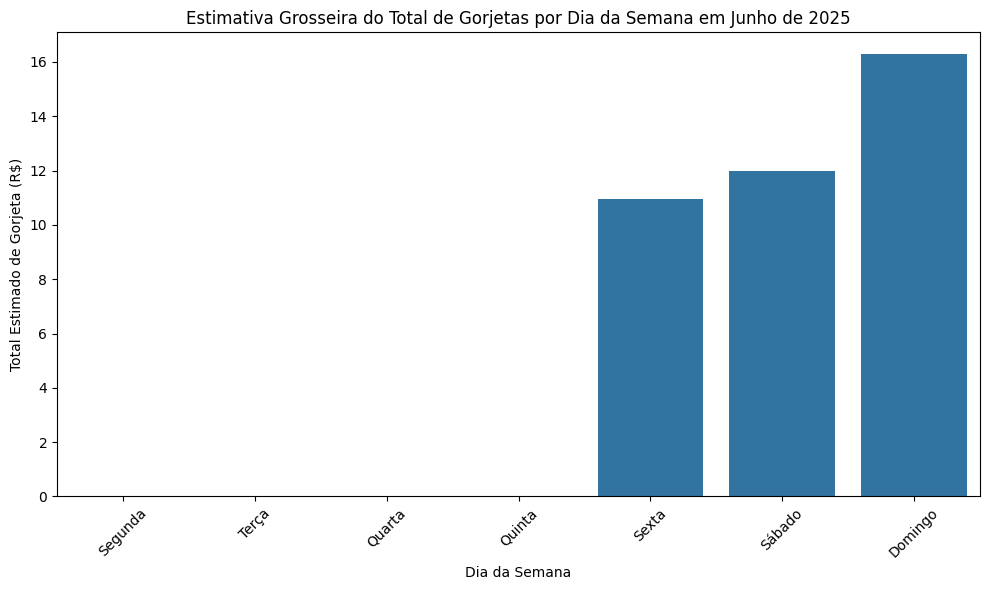

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter

# Carrega o dataset de gorjetas
tips = sns.load_dataset('tips')

# Dicionário para mapear os dias da semana do inglês para o português (para o gráfico)
dias_semana_portugues = {
    'Thur': 'Quinta',
    'Fri': 'Sexta',
    'Sat': 'Sábado',
    'Sun': 'Domingo',
    'Mon': 'Segunda',
    'Tue': 'Terça',
    'Wed': 'Quarta'
}

# 1. Calcular as médias históricas de gorjeta por dia da semana
media_gorjeta_por_dia = tips.groupby('day')['tip'].mean()

# 2. Supondo o mês de junho de 2025
junho_2025 = pd.date_range(start='2025-06-01', end='2025-06-30', freq='D')
dias_da_semana_junho_ingles = [dia.strftime('%a') for dia in junho_2025]
contagem_dias_ingles = Counter(dias_da_semana_junho_ingles)

# 3. Calcular a estimativa do total de gorjetas por dia da semana em junho
total_gorjeta_estimada_por_dia = {}
for dia_ingles, media in media_gorjeta_por_dia.items():
    if dia_ingles in contagem_dias_ingles:
        dia_portugues = dias_semana_portugues.get(dia_ingles, dia_ingles)
        total_gorjeta_estimada_por_dia[dia_portugues] = media * contagem_dias_ingles[dia_ingles]

# Converter para um DataFrame para facilitar o gráfico
df_gorjetas_mensal = pd.DataFrame(list(total_gorjeta_estimada_por_dia.items()), columns=['Dia da Semana', 'Total Estimado de Gorjeta (R$)'])

# Ordenar os dias da semana para o gráfico ficar mais intuitivo
dias_ordenados = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
df_gorjetas_mensal['Dia da Semana'] = pd.Categorical(df_gorjetas_mensal['Dia da Semana'], categories=dias_ordenados, ordered=True)
df_gorjetas_mensal = df_gorjetas_mensal.sort_values('Dia da Semana')

# 4. Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Dia da Semana', y='Total Estimado de Gorjeta (R$)', data=df_gorjetas_mensal)
plt.title('Estimativa Grosseira do Total de Gorjetas por Dia da Semana em Junho de 2025')
plt.xlabel('Dia da Semana')
plt.ylabel('Total Estimado de Gorjeta (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-34-9a16da9274e2>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_gorjeta_por_dia = tips.groupby('day')['tip'].mean()


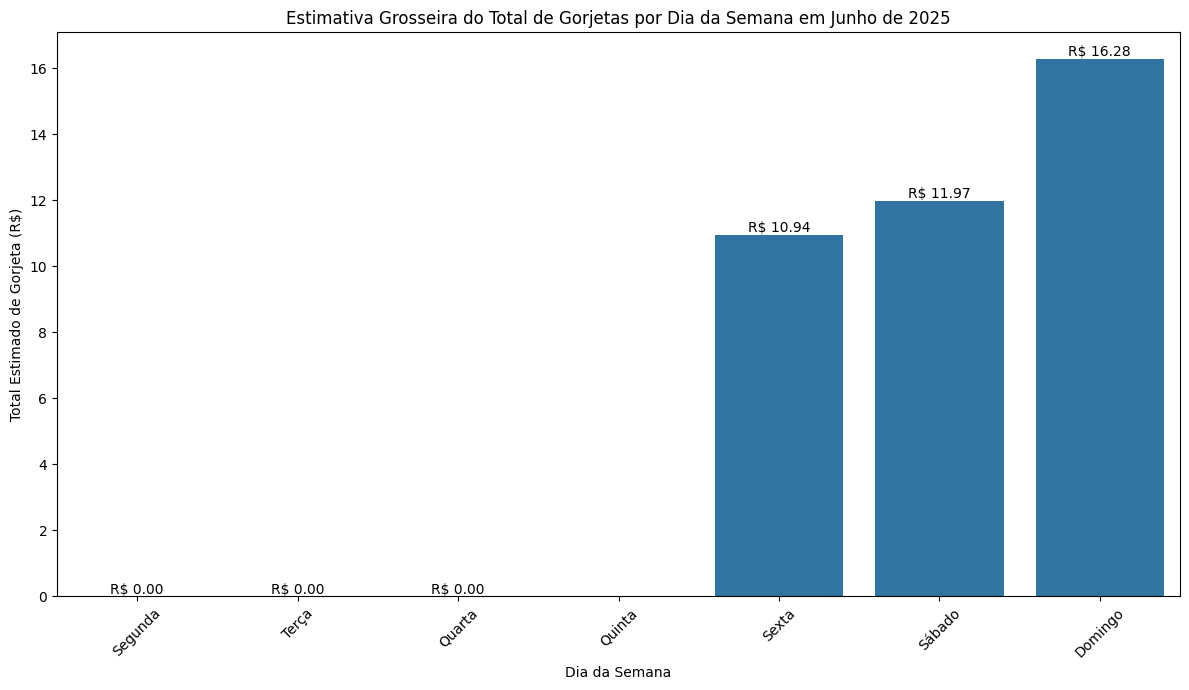

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter

# Carrega o dataset de gorjetas
tips = sns.load_dataset('tips')

# Dicionário para mapear os dias da semana do inglês para o português (para o gráfico)
dias_semana_portugues = {
    'Thur': 'Quinta',
    'Fri': 'Sexta',
    'Sat': 'Sábado',
    'Sun': 'Domingo',
    'Mon': 'Segunda',
    'Tue': 'Terça',
    'Wed': 'Quarta'
}

# 1. Calcular as médias históricas de gorjeta por dia da semana
media_gorjeta_por_dia = tips.groupby('day')['tip'].mean()

# Adicionar médias de gorjeta zero para os dias faltantes
dias_faltantes = ['Mon', 'Tue', 'Wed']
for dia in dias_faltantes:
    if dia not in media_gorjeta_por_dia:
        media_gorjeta_por_dia[dia] = 0.0

# 2. Supondo o mês de junho de 2025
junho_2025 = pd.date_range(start='2025-06-01', end='2025-06-30', freq='D')
dias_da_semana_junho_ingles = [dia.strftime('%a') for dia in junho_2025]
contagem_dias_ingles = Counter(dias_da_semana_junho_ingles)

# 3. Calcular a estimativa do total de gorjetas por dia da semana em junho
total_gorjeta_estimada_por_dia = {}
for dia_ingles, media in media_gorjeta_por_dia.items():
    if dia_ingles in contagem_dias_ingles:
        dia_portugues = dias_semana_portugues.get(dia_ingles, dia_ingles)
        total_gorjeta_estimada_por_dia[dia_portugues] = media * contagem_dias_ingles[dia_ingles]

# Converter para um DataFrame para facilitar o gráfico
df_gorjetas_mensal = pd.DataFrame(list(total_gorjeta_estimada_por_dia.items()), columns=['Dia da Semana', 'Total Estimado de Gorjeta (R$)'])

# Ordenar os dias da semana para o gráfico ficar mais intuitivo
dias_ordenados = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
df_gorjetas_mensal['Dia da Semana'] = pd.Categorical(df_gorjetas_mensal['Dia da Semana'], categories=dias_ordenados, ordered=True)
df_gorjetas_mensal = df_gorjetas_mensal.sort_values('Dia da Semana')

# 4. Criar o gráfico de barras com anotações
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Dia da Semana', y='Total Estimado de Gorjeta (R$)', data=df_gorjetas_mensal)
plt.title('Estimativa Grosseira do Total de Gorjetas por Dia da Semana em Junho de 2025')
plt.xlabel('Dia da Semana')
plt.ylabel('Total Estimado de Gorjeta (R$)')
plt.xticks(rotation=45)

# Adicionar os valores acima de cada barra
for p in ax.patches:
    ax.annotate(f'R$ {p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


In [ ]:
# Adicionar os valores acima de cada barra
for p in ax.patches:
    ax.annotate(f'R$ {p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')